# Exercise 7 - Approximating the Sine function
## Task
Approximate the sine function with a fully connected neural network using PyTorch.

Subtasks:
- Change the neural network architecture to a single hidden layer with two neurons.
  - What do you observe?
- Increase the number of neurons per layer and the number of layers. Try, e.g., [2] and [50,50]. What do you observe?
  - Name ways to overcome this problem.
- At what epoch should the algorithm stop to prevent overfitting?
- Set the learning rate to α = 0.1. What do you observe?
- Reset the learning rate to α = 0.001 and set λ > 0 where the model fits the sine curve without overfitting.
- Increase λ until underfitting occurs and plot the result.
- Change the model to use ReLU activation function and plot the result.
- Why does the neural network not learn the sine function properly at the boundaries (and beyond the boundaries)?

## Learning Goals
- Get an understanding of the code and introduction to model training.
- Influence of hyperparameters on model fit - which hyperparameters are the most important?
- Change the non-linear activation function to ReLU instead of Sigmoid.
- Why does the model not learn the sine curve properly at the boundaries? Is there any remedy to this problem? 

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

**data generation**

In [6]:
torch.manual_seed(0)

f = lambda x: torch.sin(2 * torch.pi * x)

numberOfSamples = 40  # number of samples
noise = 0.1  # random noise added to the training and validation data

xTrain = torch.rand((numberOfSamples, 1)) * 2 - 1
yTrain = f(xTrain) + noise * (torch.rand(xTrain.shape) * 2 - 1)

xTest = torch.rand((numberOfSamples, 1)) * 2 - 1
yTest = f(xTest) + noise * (torch.rand(xTest.shape) * 2 - 1)

**model setup**

In [7]:
inputDimension = 1
hiddenDimensions = [20, 20]  # e.g. [20, 20] for 2 hidden layers with 20 neurons each
outputDimension = 1

nonlinearity = torch.nn.Sigmoid()  # torch.nn.ReLU()

In [8]:
modules = []
modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))
modules.append(nonlinearity)
for i in range(len(hiddenDimensions) - 1):
    modules.append(torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1]))
    modules.append(nonlinearity)

modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))

model = torch.nn.Sequential(*modules)

**hyperparameters & optimizer**

In [9]:
epochs = 10000
lr = 1e-3
regularization = 1e-4

optimizer = torch.optim.Adam(
    model.parameters(), lr, weight_decay=regularization
)  # weight_decay is L2 regularization in Adam

**cost function**

In [10]:
def costFunction(yPred, y):
    cost = torch.mean((yPred - y) ** 2)
    return cost

**training loop**

In [11]:
costHistoryTrain = np.zeros(epochs)
costHistoryTest = np.zeros(epochs)
for epoch in range(epochs):
    optimizer.zero_grad()

    yPred = model(xTrain)
    cost = costFunction(yPred, yTrain)

    with torch.no_grad():
        yPredTest = model(xTest)
        costTest = costFunction(yPredTest, yTest)

    costHistoryTrain[epoch] = cost.detach()
    costHistoryTest[epoch] = costTest

    cost.backward()

    optimizer.step()

    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
        print(string.format(epoch, epochs, cost.detach(), costTest))

Epoch: 0/10000		Training cost = 5.74e-01		Validation cost = 6.05e-01
Epoch: 100/10000		Training cost = 4.80e-01		Validation cost = 4.71e-01
Epoch: 200/10000		Training cost = 4.36e-01		Validation cost = 4.35e-01
Epoch: 300/10000		Training cost = 4.13e-01		Validation cost = 4.24e-01
Epoch: 400/10000		Training cost = 4.11e-01		Validation cost = 4.25e-01
Epoch: 500/10000		Training cost = 4.10e-01		Validation cost = 4.26e-01
Epoch: 600/10000		Training cost = 4.09e-01		Validation cost = 4.26e-01
Epoch: 700/10000		Training cost = 4.08e-01		Validation cost = 4.27e-01
Epoch: 800/10000		Training cost = 4.07e-01		Validation cost = 4.27e-01
Epoch: 900/10000		Training cost = 4.06e-01		Validation cost = 4.28e-01
Epoch: 1000/10000		Training cost = 4.05e-01		Validation cost = 4.28e-01
Epoch: 1100/10000		Training cost = 4.04e-01		Validation cost = 4.29e-01
Epoch: 1200/10000		Training cost = 4.02e-01		Validation cost = 4.31e-01
Epoch: 1300/10000		Training cost = 4.00e-01		Validation cost = 4.32e-01
Epoc

**visualize the prediction**

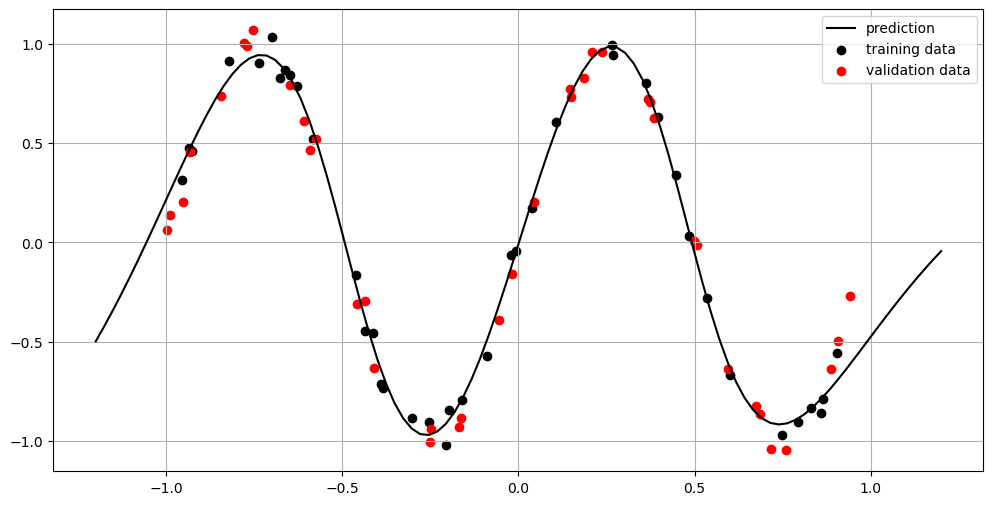

In [12]:
x = torch.linspace(-1.2, 1.2, 100).unsqueeze(1)
yPred = model(x).detach()

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x, yPred, "k", label="prediction")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.scatter(xTest, yTest, color="r", label="validation data")
ax.legend()
plt.show()

**visualize the training history**

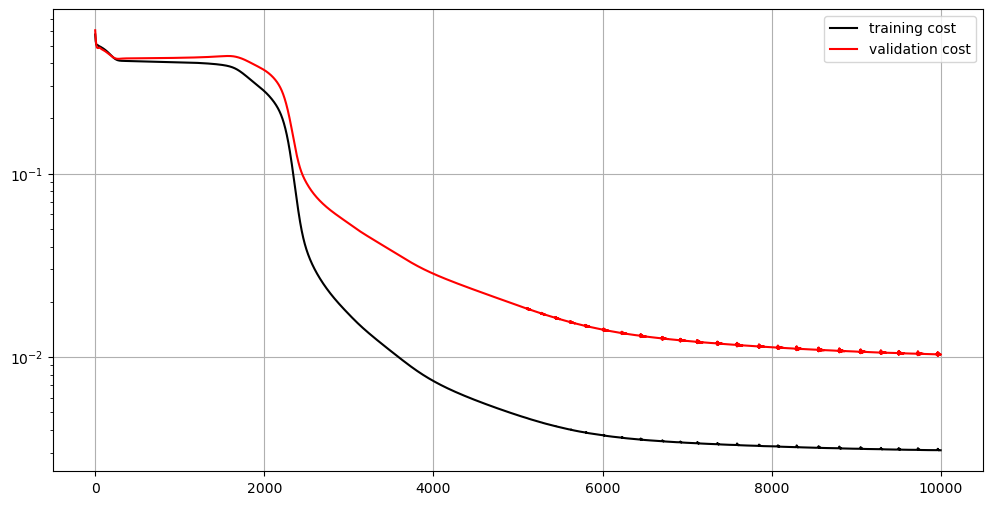

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(costHistoryTrain, "k", label="training cost")
ax.plot(costHistoryTest, "r", label="validation cost")
ax.legend()
ax.set_yscale("log")
plt.show()

**compute derivative visualization for reference**

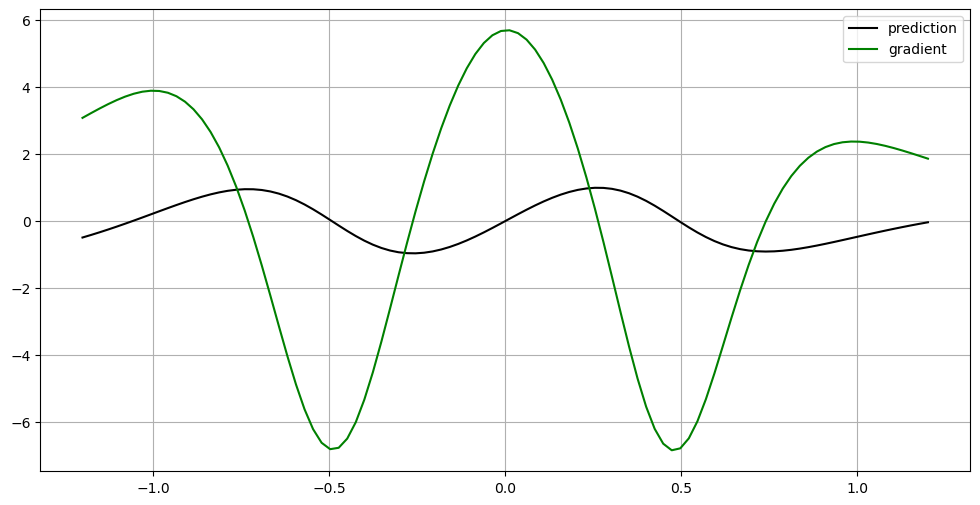

In [14]:
x = torch.linspace(-1.2, 1.2, 100, requires_grad=True).unsqueeze(1)
yPred = model(x)
gradients = torch.autograd.grad(yPred, x, grad_outputs=torch.ones_like(yPred))[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x.detach().numpy(), yPred.detach().numpy(), "k", label="prediction")
ax.plot(x.detach().numpy(), gradients, 'g', label='gradient')
ax.legend()
plt.show()